# **Đọc và Load dữ liệu**

In [ ]:
import pandas as pd

# Đọc file dữ liệu
df = pd.read_excel("/content/BankingDataset.xlsx")

# Hiển thị 5 dòng đầu tiên
df.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,30,52,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,19,24,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,44,65,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,24,17,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,25,42,0


In [ ]:
# Kiểm tra số dòng, cột
print("Shape:", df.shape)

# Xem thông tin kiểu dữ liệu, non-null
df.info()


Shape: (10000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  LoginFrequency     10000 non-null  int64  
 11  ExternalTransfers  10000 non-null  int64  
 12  Exited             10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1015.8+ KB


In [ ]:
# Tính tỉ lệ thiếu trên mỗi cột
missing_ratio = df.isnull().mean().sort_values(ascending=False)

# Hiển thị các cột có giá trị thiếu
missing_ratio[missing_ratio > 0]


,0


In [ ]:
import json

gender_map = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].map(gender_map)

with open("gender_map.json", "w") as f:
    json.dump(gender_map, f)

**Feature Engineering**

In [ ]:
df["BalancePerProduct"] = df["Balance"] / (df["NumOfProducts"] + 1)
df["ActivityPerTenure"] = df["LoginFrequency"] / (df["Tenure"] + 1)
df["SalaryPerAge"] = df["EstimatedSalary"] / (df["Age"] + 1)
df["TransferLoginRatio"] = df["ExternalTransfers"] / (df["LoginFrequency"] + 1)

In [ ]:
df.head(5)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited,BalancePerProduct,ActivityPerTenure,SalaryPerAge,TransferLoginRatio
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,30,52,1,0.00,10.000000,2356.950698,1.677419
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,19,24,0,41903.93,9.500000,2679.585238,1.200000
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,44,65,1,39915.20,4.888889,2649.571395,1.444444
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,24,17,0,0.00,12.000000,2345.665750,0.680000
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,25,42,0,62755.41,8.333333,1797.365909,1.615385


In [ ]:
df.describe()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited,BalancePerProduct,ActivityPerTenure,SalaryPerAge,TransferLoginRatio
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,32.388000,32.220500,0.203700,33603.672464,7.786626,2673.233641,1.276829
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,13.292845,16.289433,0.402769,28665.633080,7.465067,1725.204591,1.197141
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,5.000000,1.000000,0.000000,0.000000,0.454545,0.251739,0.014493
25%,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,22.000000,20.000000,0.000000,0.000000,3.454545,1281.816189,0.545455
50%,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,32.000000,31.000000,0.000000,38452.862500,5.428571,2473.177448,0.958759
75%,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,42.000000,43.000000,0.000000,57167.393750,9.297619,3866.862444,1.580645
max,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,81.000000,91.000000,1.000000,119193.780000,70.000000,10385.375263,12.000000


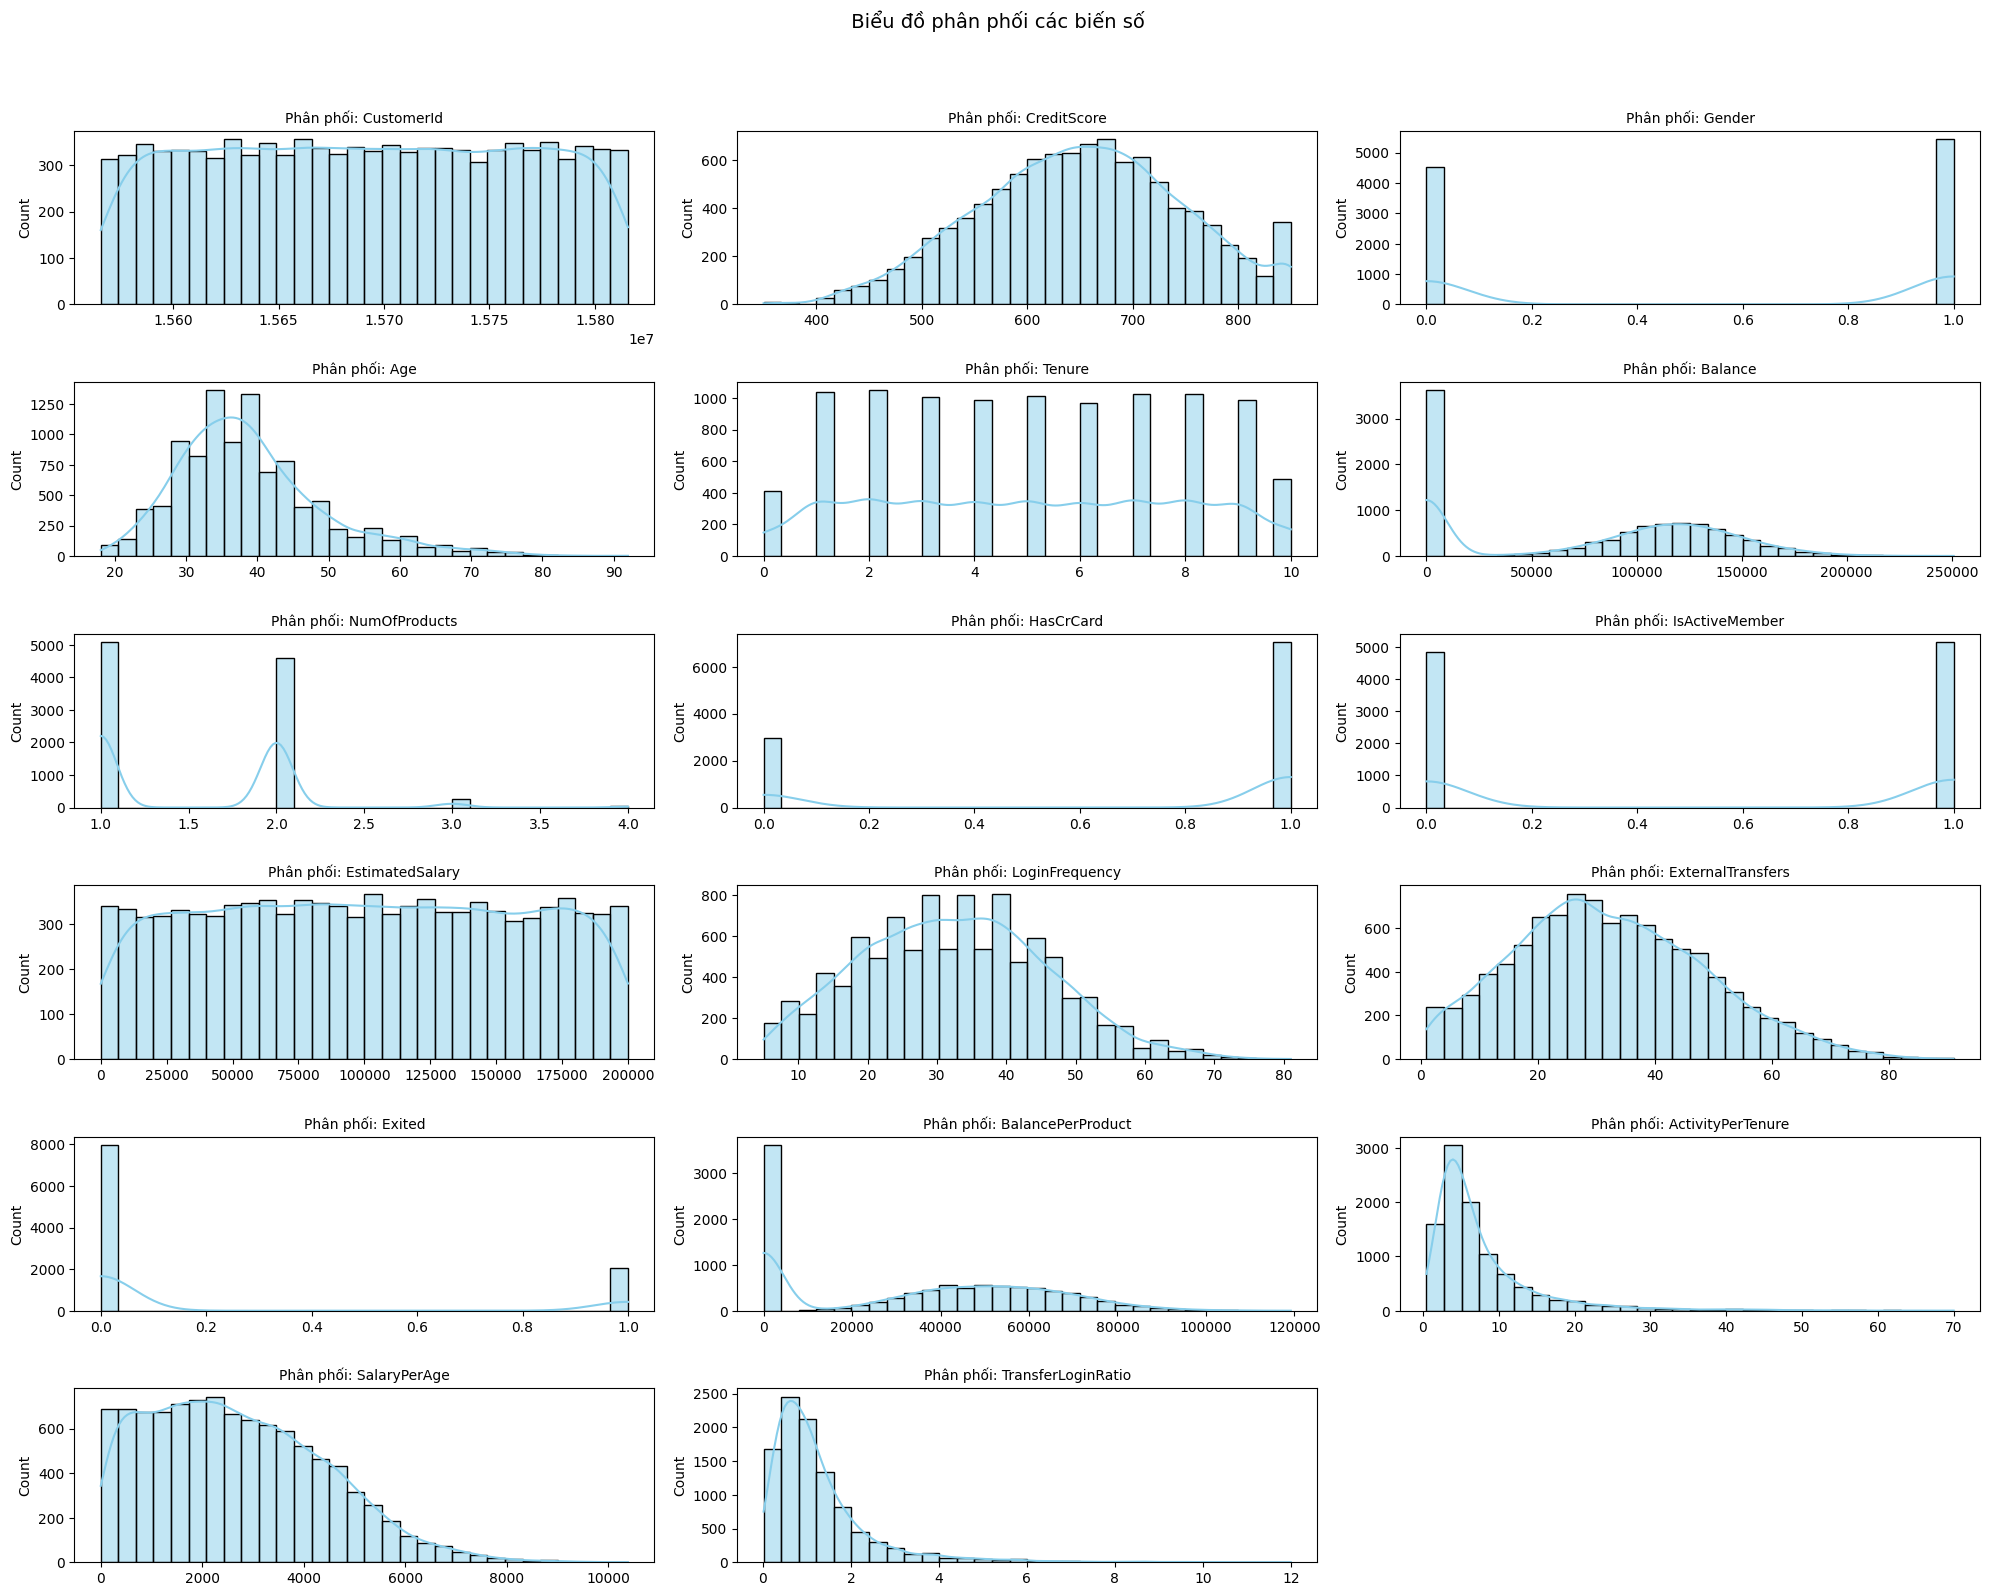

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chỉ lấy các cột dạng số (loại bỏ ID / string / object)
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot
plt.figure(figsize=(20, len(numeric_cols) * 2.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 3, i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f"Phân phối: {col}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle(" Biểu đồ phân phối các biến số", fontsize=14, y=1.02)
plt.show()


In [ ]:
# Các cột cần xử lý outlier
feature_engineered = [
    "BalancePerProduct",
    "ActivityPerTenure",
    "SalaryPerAge",
    "TransferLoginRatio"
]

# Tạo log để theo dõi số dòng bị clip
outlier_log = {}

for col in feature_engineered:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = df[col].copy()
    df[col] = df[col].clip(lower, upper)

    clipped = ((before < lower) | (before > upper)).sum()
    outlier_log[col] = clipped

# In log kết quả
for col, clipped in sorted(outlier_log.items(), key=lambda x: x[1], reverse=True):
    print(f"{col:25s} → {clipped} dòng bị clip")


ActivityPerTenure         → 772 dòng bị clip
TransferLoginRatio        → 642 dòng bị clip
SalaryPerAge              → 43 dòng bị clip
BalancePerProduct         → 0 dòng bị clip


# **Tương quan**

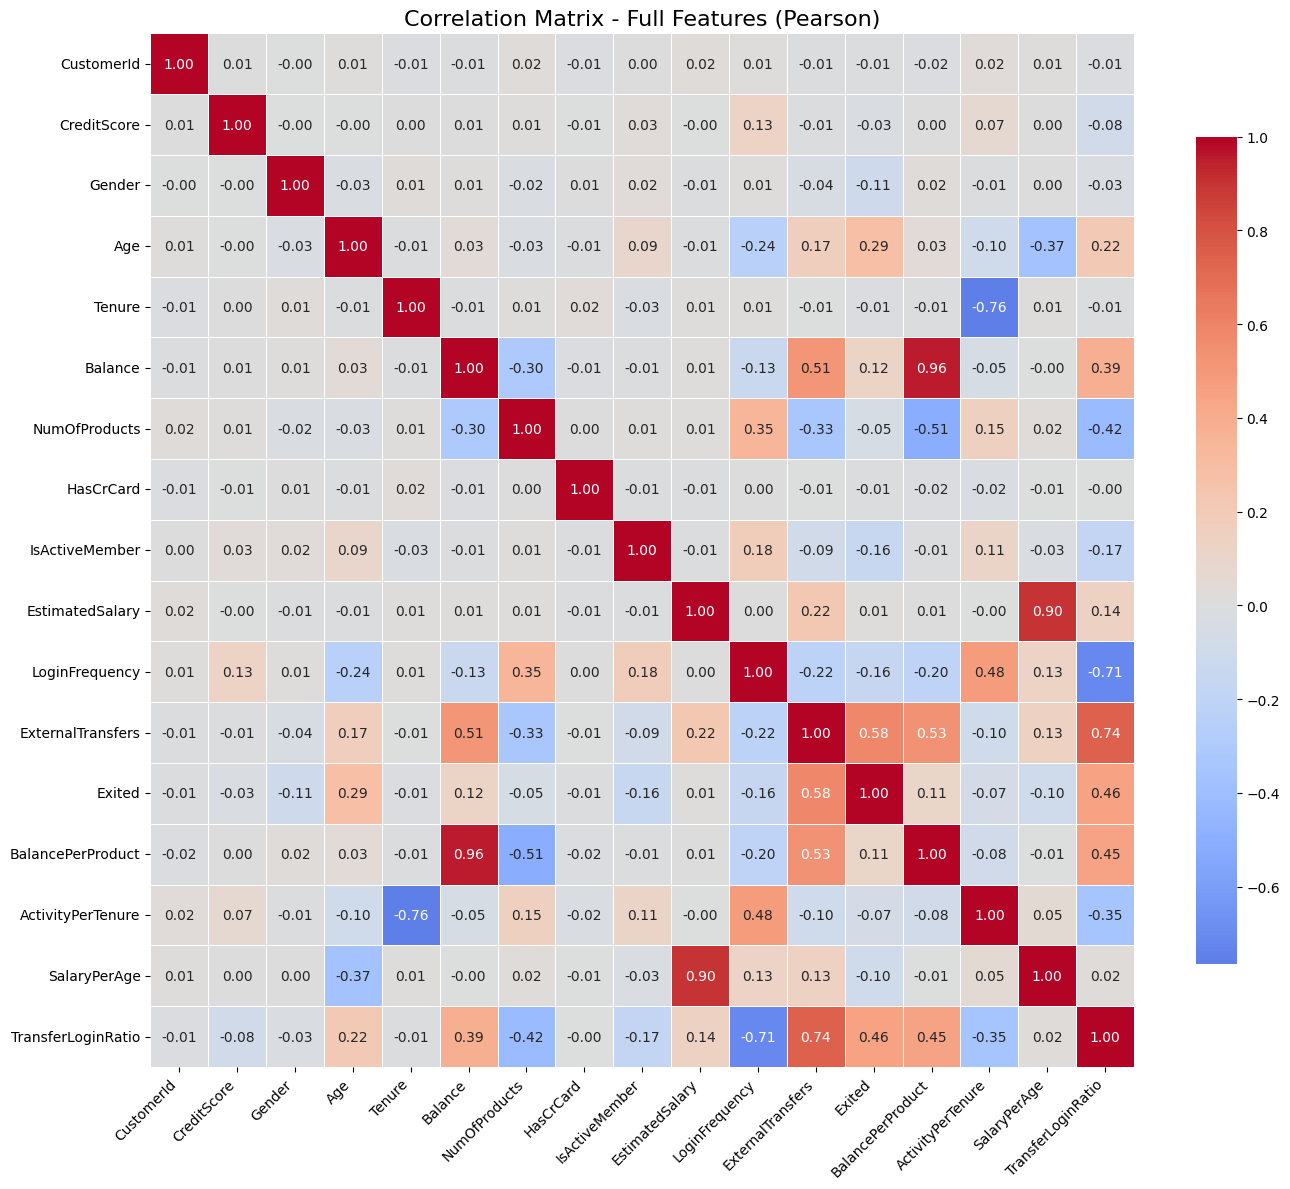

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính hệ số tương quan Pearson
corr_matrix = df.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix - Full Features (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ExternalTransfers     0.194913
TransferLoginRatio    0.140503
NumOfProducts         0.076398
Age                   0.069033
IsActiveMember        0.021949
BalancePerProduct     0.017839
LoginFrequency        0.012910
SalaryPerAge          0.011816
Gender                0.011162
Balance               0.009240
ActivityPerTenure     0.009047
CreditScore           0.003305
EstimatedSalary       0.002704
HasCrCard             0.000000
CustomerId            0.000000
Tenure                0.000000
dtype: float64


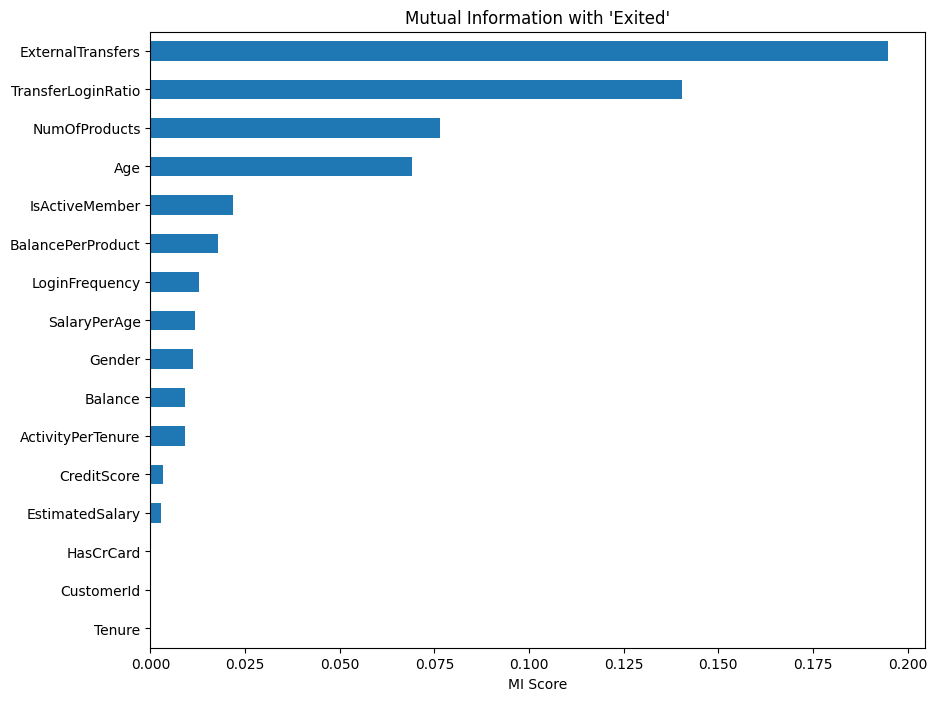

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X_all = df.drop(columns="Exited")
y_all = df["Exited"]

mi_scores = mutual_info_classif(X_all.fillna(0), y_all, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_all.columns).sort_values(ascending=False)

# Hiển thị top features
print(mi_series)

# Plot MI scores
mi_series.plot(kind='barh', figsize=(10, 8))
plt.title("Mutual Information with 'Exited'")
plt.xlabel("MI Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
selected_features = [
    "ExternalTransfers",
    "TransferLoginRatio",
    "NumOfProducts",
    "Age",
    "IsActiveMember",
    "BalancePerProduct",
    "ActivityPerTenure",
    "SalaryPerAge"
]

In [ ]:
from sklearn.model_selection import train_test_split

# Lấy input đầu vào
X = df[selected_features]
y = df["Exited"]

# 1. Tách test trước (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Tách calib từ phần còn lại (10% → 12.5% của X_temp)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42
)


# **Machine Learning**

In [ ]:
!pip install shap -U

# **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print(" Đánh giá Random Forest:")
print(classification_report(y_test, y_pred, digits=4))

 Đánh giá Random Forest:
              precision    recall  f1-score   support

           0     0.9270    0.9799    0.9527      1593
           1     0.8987    0.6978    0.7856       407

    accuracy                         0.9225      2000
   macro avg     0.9128    0.8389    0.8692      2000
weighted avg     0.9212    0.9225    0.9187      2000



In [ ]:
import joblib

# Lưu model
joblib.dump(rf_model, "rf_model_final.pkl")
print(" Đã lưu model RF → rf_model_final.pkl")


 Đã lưu model RF → rf_model_final.pkl


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Tính scale_pos_weight (tỷ lệ class 0 / class 1)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=500,
    scale_pos_weight=scale_weight,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(" Đánh giá XGBoost:")
print(classification_report(y_test, y_pred_xgb, digits=4))

 Đánh giá XGBoost:
              precision    recall  f1-score   support

           0     0.9374    0.9680    0.9524      1593
           1     0.8563    0.7469    0.7979       407

    accuracy                         0.9230      2000
   macro avg     0.8969    0.8575    0.8752      2000
weighted avg     0.9209    0.9230    0.9210      2000



In [ ]:
import joblib
joblib.dump(xgb_model, "xgb_model_final.pkl")
print("✅ Đã lưu model → xgb_model_final.pkl")


✅ Đã lưu model → xgb_model_final.pkl


# **LightGBM**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


# Train LightGBM
lgb_model = LGBMClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

lgb_model.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 1426, number of negative: 5574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', n_estimators=500, random_state=42)

In [ ]:
# Predict trên test
y_pred_lgb = lgb_model.predict(X_test)

# Đánh giá
print(" Đánh giá LightGBM:")
print(classification_report(y_test, y_pred_lgb, digits=4))

 Đánh giá LightGBM:
              precision    recall  f1-score   support

           0     0.9405    0.9730    0.9565      1593
           1     0.8778    0.7592    0.8142       407

    accuracy                         0.9295      2000
   macro avg     0.9092    0.8661    0.8854      2000
weighted avg     0.9278    0.9295    0.9275      2000



In [ ]:
import joblib
joblib.dump(lgb_model, "lgb_model_final.pkl")
print("✅ Đã lưu LightGBM → lgb_model_final.pkl")


✅ Đã lưu LightGBM → lgb_model_final.pkl


# **So sánh mô hình**

In [ ]:
# Load tất cả các mô hình đã huấn luyện
rf_model = joblib.load('rf_model_final.pkl')
xgb_model = joblib.load('xgb_model_final.pkl')
lgb_model = joblib.load('lgb_model_final.pkl')



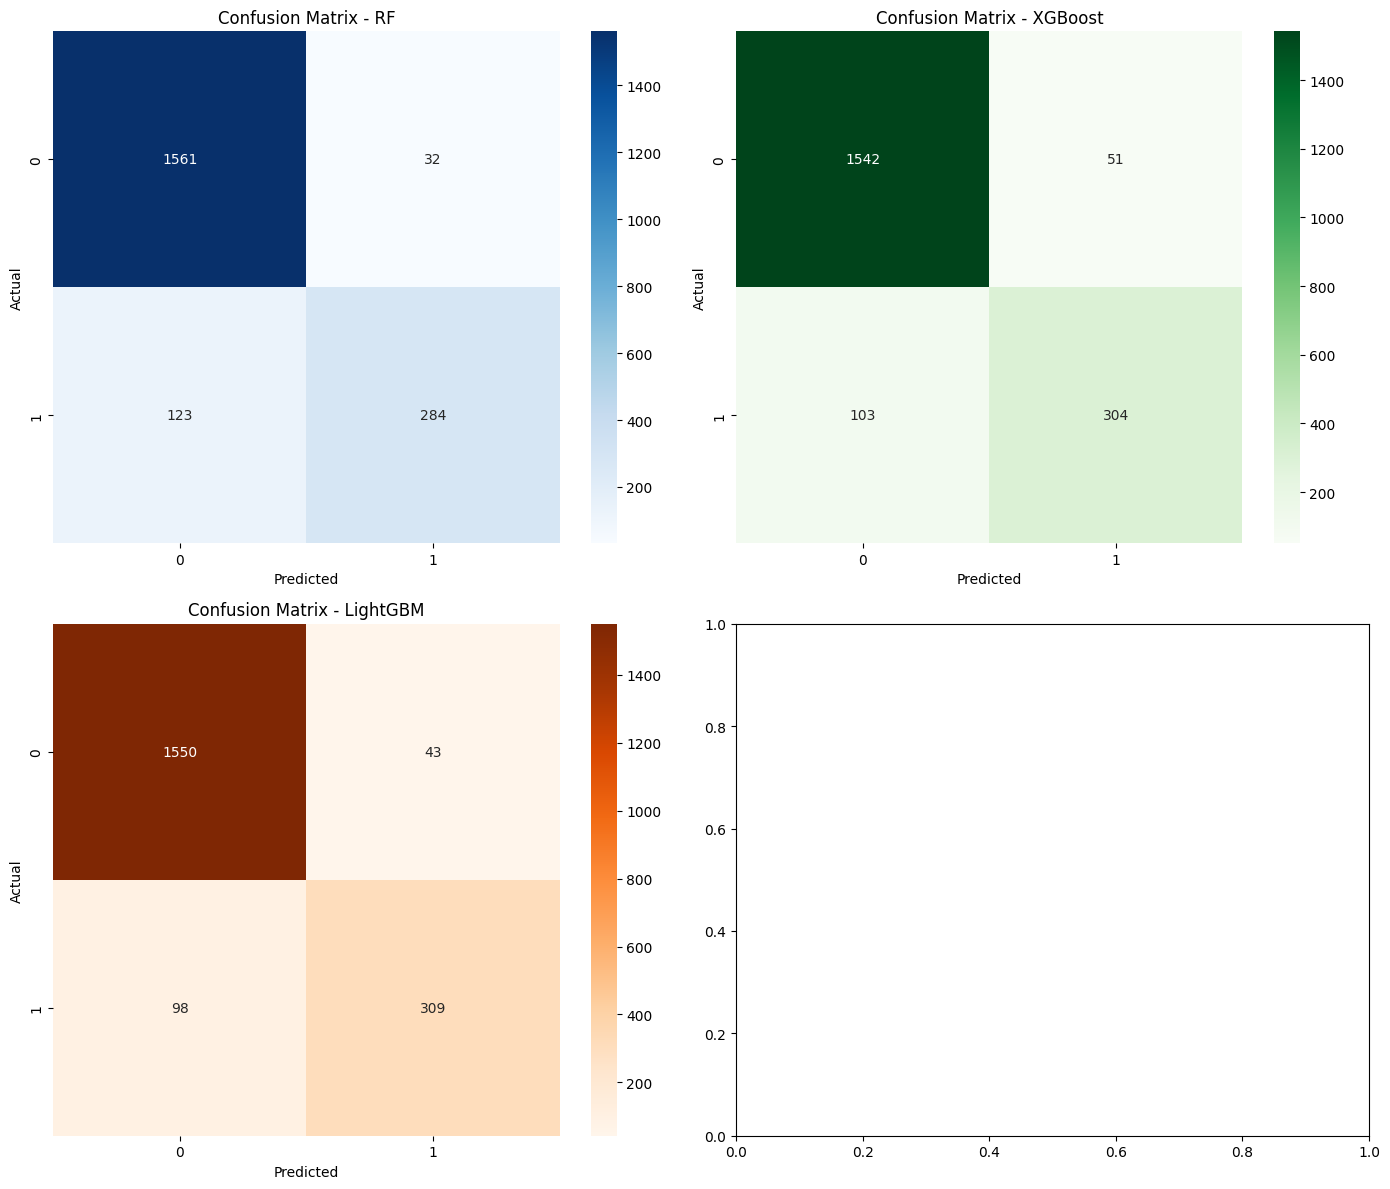

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dự đoán từ các mô hình
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Vẽ Confusion Matrix cho mỗi mô hình
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix - RF")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix - XGBoost")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges', ax=axs[1, 0])
axs[1, 0].set_title("Confusion Matrix - LightGBM")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
# Create classification report for each model
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)

# Convert each classification report into a DataFrame
df_rf = pd.DataFrame(report_rf).T
df_xgb = pd.DataFrame(report_xgb).T
df_lgb = pd.DataFrame(report_lgb).T

# Combine the DataFrames for comparison
df_comparison = pd.concat([df_rf[['precision', 'recall', 'f1-score']],
                           df_xgb[['precision', 'recall', 'f1-score']],
                           df_lgb[['precision', 'recall', 'f1-score']]],
                          axis=1)

# Rename the columns for clarity
df_comparison.columns = ['RF - Precision', 'RF - Recall', 'RF - F1-Score',
                         'XGBoost - Precision', 'XGBoost - Recall', 'XGBoost - F1-Score',
                         'LightGBM - Precision', 'LightGBM - Recall', 'LightGBM - F1-Score']

# Display the comparison table directly in Colab
df_comparison


,RF - Precision,RF - Recall,RF - F1-Score,XGBoost - Precision,XGBoost - Recall,XGBoost - F1-Score,LightGBM - Precision,LightGBM - Recall,LightGBM - F1-Score
0,0.926960,0.979912,0.952701,0.937386,0.967985,0.952440,0.940534,0.973007,0.956495
1,0.898734,0.697789,0.785615,0.856338,0.746929,0.797900,0.877841,0.759214,0.814229
accuracy,0.922500,0.922500,0.922500,0.923000,0.923000,0.923000,0.929500,0.929500,0.929500
macro avg,0.912847,0.838850,0.869158,0.896862,0.857457,0.875170,0.909187,0.866110,0.885362
weighted avg,0.921216,0.922500,0.918699,0.920893,0.923000,0.920991,0.927776,0.929500,0.927544


In [ ]:
pip install --upgrade shap


In [ ]:
import joblib
import json
import os

# Tạo thư mục nếu chưa có
os.makedirs("models", exist_ok=True)

# SAVE feature list đúng thứ tự cột lúc train
with open("models/feature_list.json", "w") as f:
    json.dump(list(X_train.columns), f)


In [ ]:
import shap
import joblib
import json

# Load model
model = joblib.load("/content/models/final_model.pkl")

# Load feature list để đảm bảo đúng thứ tự
with open("/content/models/feature_list.json") as f:
    feature_list = json.load(f)

# Đảm bảo X_test đúng thứ tự cột
X_test = X_test[feature_list]

# Tạo explainer cho tree model
explainer = shap.TreeExplainer(model)

# Tính SHAP values
shap_values = explainer.shap_values(X_test)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


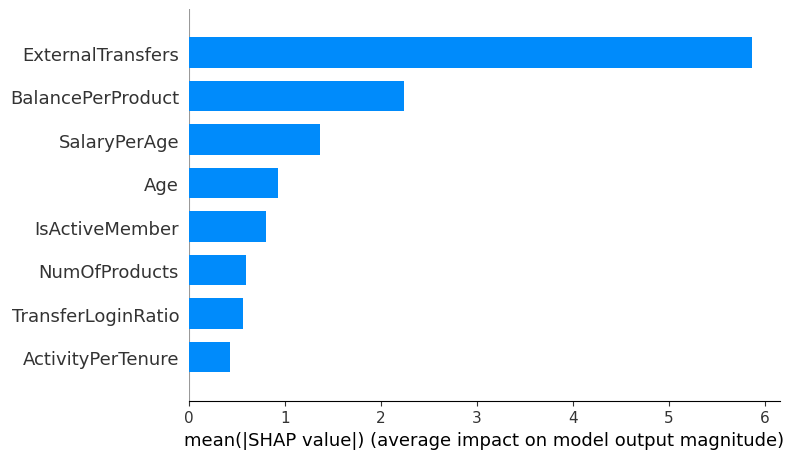

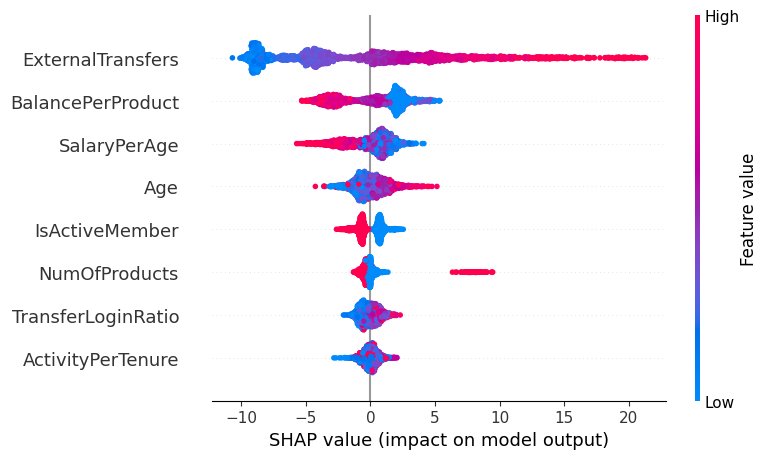

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

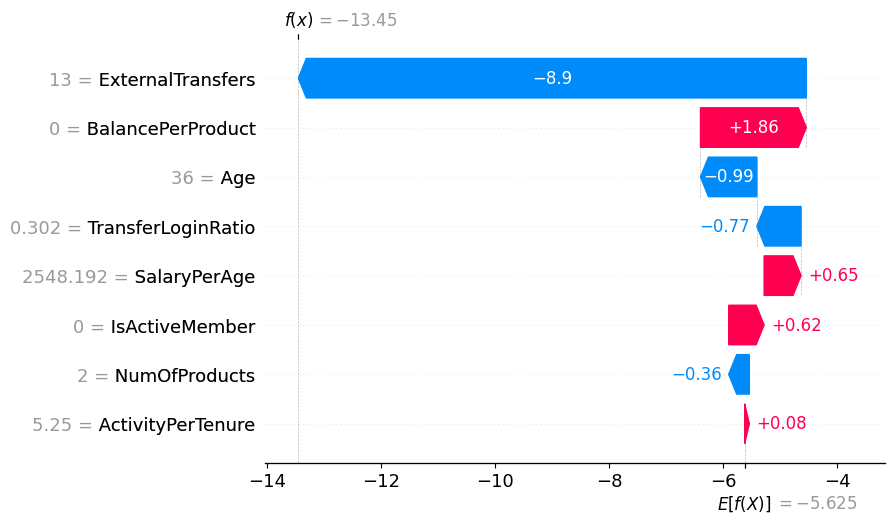

In [ ]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test.iloc[0]
))

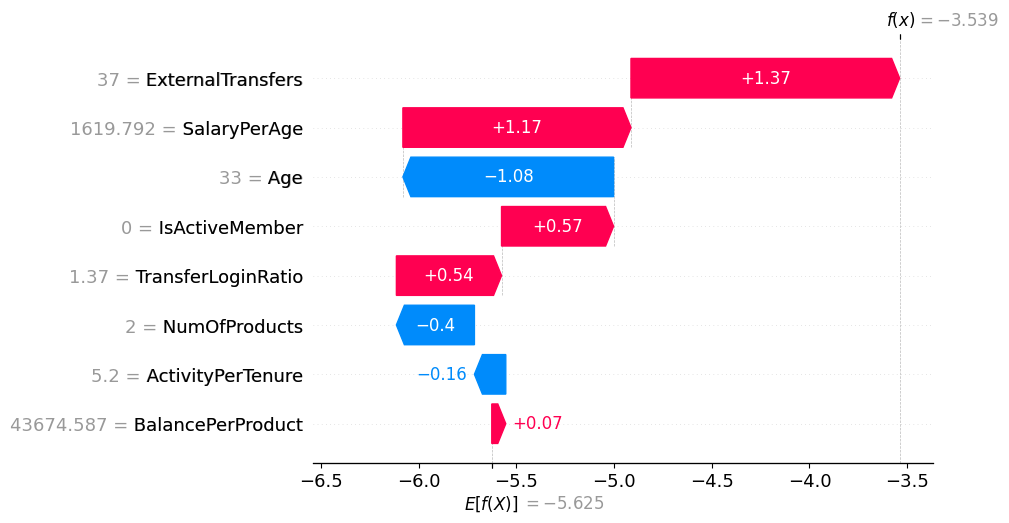

In [ ]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[1],
    base_values=explainer.expected_value,
    data=X_test.iloc[1]
))

# **MAPIE**

In [ ]:
!pip install mapie -U


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.1/178.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 112.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import joblib
from mapie.classification import MapieClassifier

# Load lại model đã train
lgb_model = joblib.load('/content/lgb_model_final.pkl')

# Fit Mapie với model đã huấn luyện
mapie_clf = MapieClassifier(estimator=lgb_model, method="lac", cv="prefit")
mapie_clf.fit(X_calib, y_calib)

MapieClassifier(cv='prefit',
                estimator=LGBMClassifier(class_weight='balanced',
                                         n_estimators=500, random_state=42),
                method='lac')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

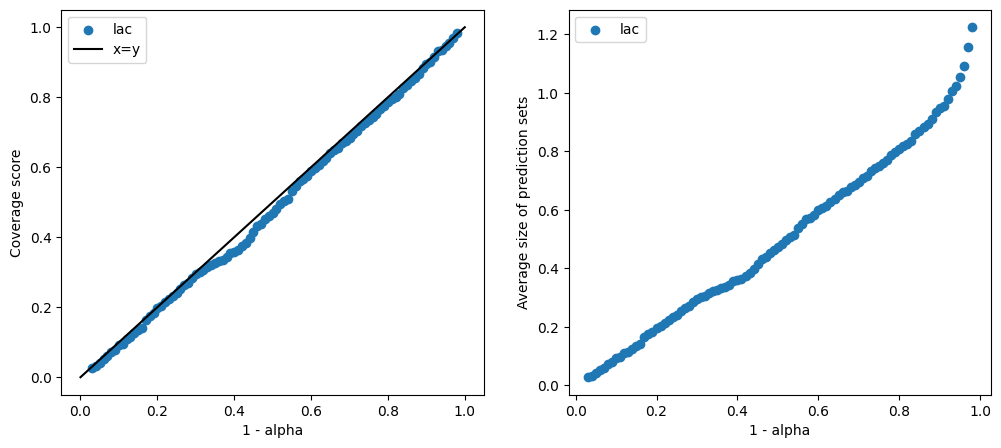

,alpha,coverages,widths
0,0.02,0.9825,1.2245
1,0.03,0.9705,1.1570
2,0.04,0.9555,1.0930
3,0.05,0.9475,1.0535
4,0.06,0.9360,1.0225
5,0.07,0.9310,1.0070
6,0.08,0.9145,0.9785
7,0.09,0.9005,0.9565
8,0.10,0.8950,0.9475
9,0.11,0.8830,0.9340


In [ ]:
from mapie.metrics import classification_coverage_score, classification_mean_width_score
import numpy as np
import matplotlib.pyplot as plt

# Tính toán MAPIE với các giá trị alpha
alpha2 = np.arange(0.01, 0.98, 0.01)
_, y_ps_score2 = mapie_clf.predict(X_test, alpha=alpha2)

# Tính toán classification_coverage_score và classification_mean_width_score cho các alpha
coverages_score = [
    classification_coverage_score(y_test, y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]
widths_score = [
    classification_mean_width_score(y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]

# Vẽ đồ thị so sánh coverage và width cho các alpha
def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Đồ thị Coverage
    axs[0].scatter(1 - alpha, coverage, label=method)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].plot([0, 1], [0, 1], label="x=y", color="black")
    axs[0].legend()

    # Đồ thị Width
    axs[1].scatter(1 - alpha, width, label=method)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of prediction sets")
    axs[1].legend()

    plt.show()

# Vẽ đồ thị
plot_coverages_widths(alpha2, coverages_score, widths_score, "lac")

# Tạo dataframe để hiển thị kết quả
results = pd.DataFrame()
results['alpha'] = alpha2
results['coverages'] = coverages_score
results['widths'] = widths_score

# Hiển thị 10 dòng đầu tiên
results.head(20)


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results)

KeyboardInterrupt: 

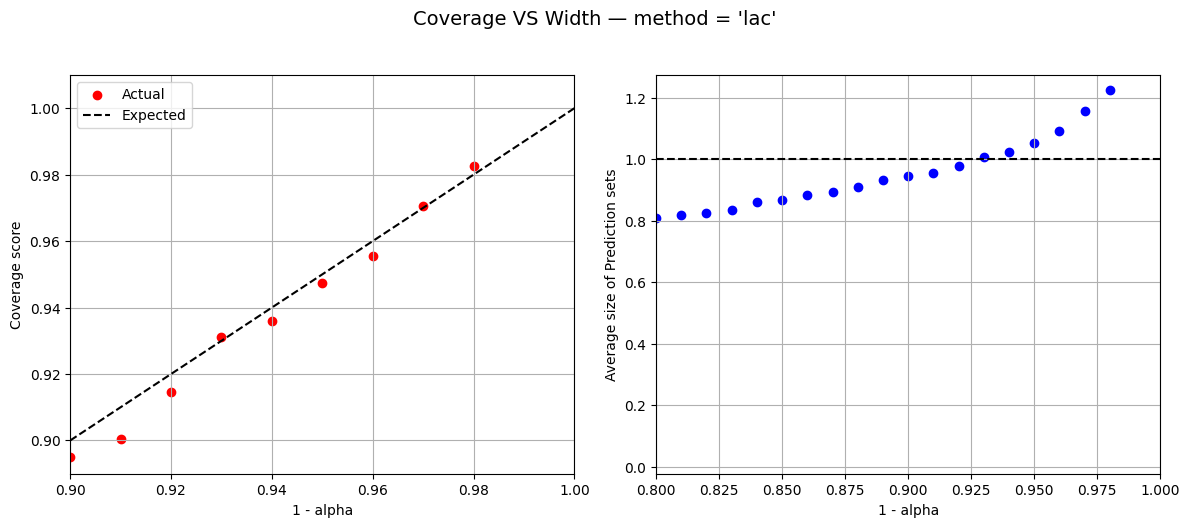

In [ ]:
def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

    # Plot Coverage
    x_values = 1 - alpha
    axs[0].scatter(x_values, coverage, color='red', label='Actual')
    axs[0].plot([0.9, 1], [0.9, 1], color='black', linestyle='--', label='Expected')
    axs[0].set_xlim(0.9, 1)
    axs[0].set_ylim(0.89, 1.01)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].grid(True)
    axs[0].legend()

    # Plot Width
    y_min = min(width) - 0.05
    y_max = max(width) + 0.05
    axs[1].scatter(x_values, width, color='blue')
    axs[1].axhline(y=1, color='black', linestyle='--')
    axs[1].set_xlim(0.8, 1)
    axs[1].set_ylim(y_min, y_max)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of Prediction sets")
    axs[1].grid(True)

    plt.suptitle(f"Coverage VS Width — {method}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # để suptitle không đè lên
    plt.show()

plot_coverages_widths(alpha2, coverages_score, widths_score, "method = 'lac'")

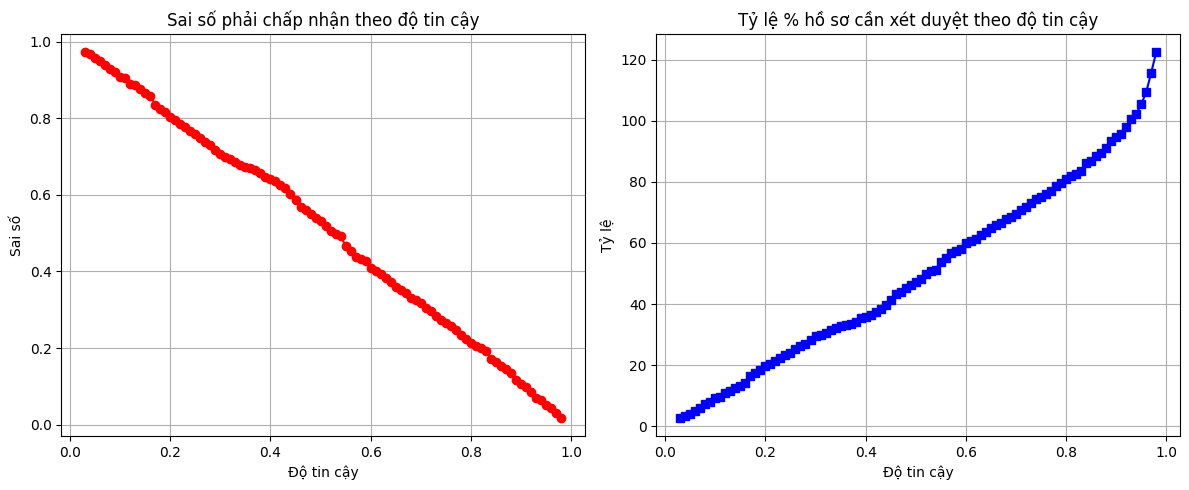

In [ ]:
# Chuẩn bị dữ liệu
results['1 - alpha'] = 1 - results['alpha']
results['1 - coverage'] = 1 - results['coverages']
results['review_rate_from_width_%'] = np.abs(1 - results['widths']) * 100
#results['review_rate_from_width_%'] = results['widths'] * 100

# Tạo figure 2 subplot ngang nhau
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Đồ thị sai số phải chấp nhận
axs[0].plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red')
axs[0].set_xlabel('Độ tin cậy')
axs[0].set_ylabel('Sai số')
axs[0].set_title('Sai số phải chấp nhận theo độ tin cậy')
axs[0].grid(True)

# Subplot 2: Đồ thị tỷ lệ hồ sơ cần xét duyệt
axs[1].plot(results['1 - alpha'], results['widths'] * 100, marker='s', color='blue')
axs[1].set_xlabel('Độ tin cậy')
axs[1].set_ylabel('Tỷ lệ')
axs[1].set_title('Tỷ lệ % hồ sơ cần xét duyệt theo độ tin cậy')
axs[1].grid(True)

# Ghép lại và hiển thị
plt.tight_layout()
plt.show()

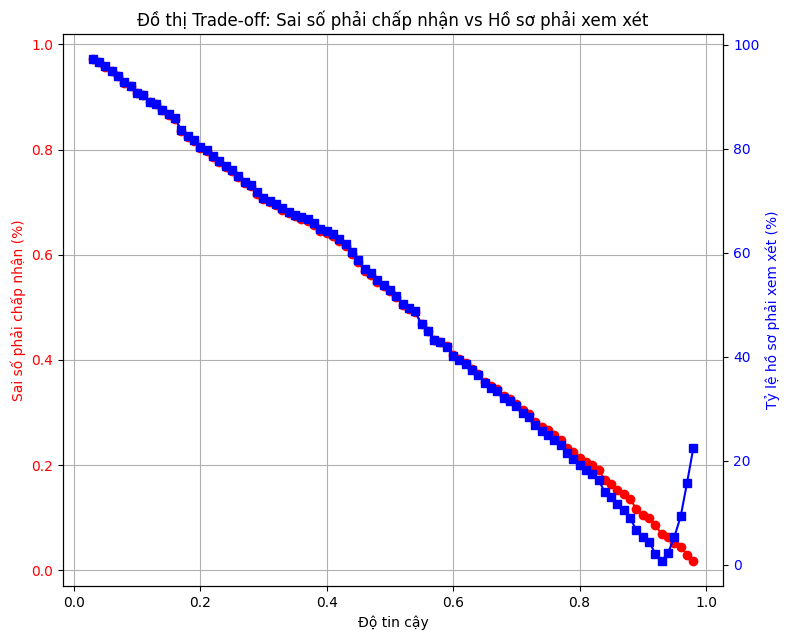

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6.5))

# Trục Y bên trái (Sai số)
ax1.plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red', label='Sai số (1 - coverage)')
ax1.set_xlabel("Độ tin cậy")
ax1.set_ylabel("Sai số phải chấp nhận (%)", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True)

# Tạo trục Y bên phải
ax2 = ax1.twinx()

# Trục Y bên phải (Hồ sơ cần xét)
ax2.plot(results['1 - alpha'], results['review_rate_from_width_%'], marker='s', color='blue', label='Hồ sơ phải xem xét (%)')
ax2.set_ylabel("Tỷ lệ hồ sơ phải xem xét (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Đồ thị Trade-off: Sai số phải chấp nhận vs Hồ sơ phải xem xét")
fig.tight_layout()
plt.show()

In [ ]:
# Tìm khoảng sai số phía - q - được cho phép bởi độ tin cậy
prob_calib = lgb_model.predict_proba(X_calib)[:, 1]                          # Dự báo xác suất class cho tập cal
nonconformity = 1 - np.where(y_calib == 1, prob_calib, 1 - prob_calib) # Sai số của mô hình - nonconformity scores: 1 - prob of true class

alpha = 0.05
q = np.quantile(nonconformity, 1 - alpha)                            # Sai số q là phân vị (= độ tin cậy) của phân phối nonconformity

# Tạo khoảng dự đoán cho tập test
prob_test = lgb_model.predict_proba(X_test)[:, 1]                          # Dự báo xác suất từng class 1 cho tập test
prob_lower = np.clip(prob_test - q, 0, 1)                            # Cộng trừ q - "sai số cho phép" vào 2 phía tạo khoảng tin cậy
prob_upper = np.clip(prob_test + q, 0, 1)

In [ ]:
interval_df = pd.DataFrame({
    'y_test': y_test.values,
    'Prob Lower': np.round(prob_lower, 2),
    'Prob Class 1': np.round(prob_test, 2),
    'Prob Upper': np.round(prob_upper, 2),

})
display(interval_df.head(5))

,y_test,Prob Lower,Prob Class 1,Prob Upper
0,0,0.0,0.00,0.80
1,0,0.0,0.03,0.83
2,0,0.0,0.00,0.80
3,0,0.0,0.00,0.80
4,0,0.0,0.02,0.82


In [ ]:
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)

# Mapie Classfier để train mô hình gốc trên tập cal để dự báo Prediction Set cho tập test
mapie_score = MapieClassifier(estimator=lgb_model, cv="prefit", method="lac")
mapie_score.fit(X_calib, y_calib)
_, y_pred_set = mapie_score.predict(X_test, alpha = alpha)

In [ ]:
# Thêm kết quả pred set vào df ở trên
interval_df['Set'] = [set(np.where(row)[0]) for row in y_pred_set[:, :, 0]]
interval_df.head(20)

,y_test,Prob Lower,Prob Class 1,Prob Upper,Set
0,0,0.00,0.00,0.80,{0}
1,0,0.00,0.03,0.83,{0}
2,0,0.00,0.00,0.80,{0}
3,0,0.00,0.00,0.80,{0}
4,0,0.00,0.02,0.82,{0}
5,0,0.00,0.00,0.80,{0}
6,0,0.00,0.00,0.80,{0}
7,0,0.00,0.01,0.80,{0}
8,0,0.16,0.96,1.00,{1}
9,0,0.00,0.00,0.80,{0}


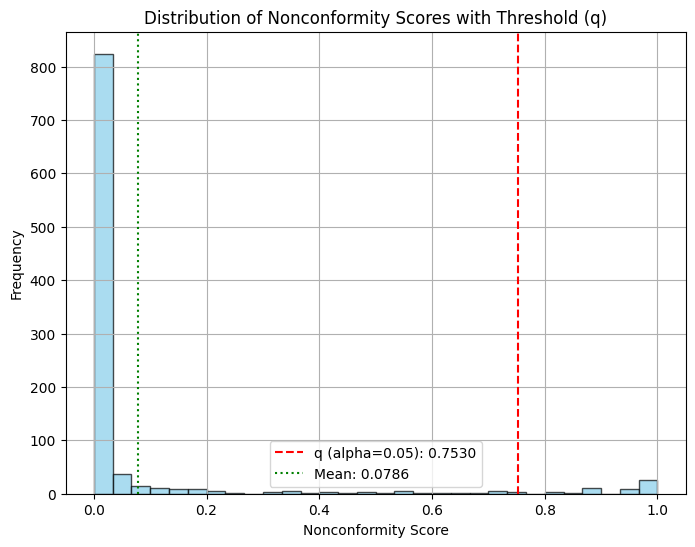

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử 'nonconformity' là mảng chứa giá trị sai số không tuân thủ của bạn
# Và 'q' là phân vị của sai số không tuân thủ
# Đoạn mã dưới vẽ đồ thị phân phối của nonconformity

plt.figure(figsize=(8, 6))

# Vẽ histogram phân phối của nonconformity
plt.hist(nonconformity, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Vẽ một dòng chỉ định phân vị q (độ tin cậy)
plt.axvline(x=q, color='red', linestyle='--', label=f"q (alpha={alpha}): {q:.4f}")

# Tùy chọn: Vẽ thêm các chỉ số (ví dụ: trung bình, phần trăm dưới q)
plt.axvline(x=np.mean(nonconformity), color='green', linestyle=':', label=f"Mean: {np.mean(nonconformity):.4f}")

# Cài đặt nhãn và tiêu đề
plt.xlabel('Nonconformity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Nonconformity Scores with Threshold (q)')
plt.legend()

plt.grid(True)
plt.show()


NameError: name 'model' is not defined